# Douban_world_movies_analysis

## Import data

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

data = pd.read_csv("douban_data/douban-world-moive-raw-data.csv",error_bad_lines=False)

In [2]:
data.head()

In [3]:
data.count()

actor         126711
date          126711
director      126711
id            126711
language      126711
rate           41646
rating_num     41646
region        126711
runtime       126711
title         126711
type          126711
year          126364
dtype: int64

## Dispose of data

### Year

In [4]:
data_selected = data[data['year'].str.contains(r'\b\d{4}\b',na=False,regex=True)]

In [5]:
data_selected = data_selected[data_selected['year'].str.contains(r'^(191[3-9])|^(19[2-9]\d)|^(202[0])|^(20[0-1]\d)$',na=False,regex=True)]

In [6]:
data_selected.count()

actor         126125
date          126125
director      126125
id            126125
language      126125
rate           41568
rating_num     41568
region        126125
runtime       126125
title         126125
type          126125
year          126125
dtype: int64

In [7]:
# def year_dis(x):
#     year = int(x)
#     if year <1912 or year>2020:
#         return '-1'
#     else:
#         return str(x)
# data_selected.year = data_selected.year.apply(year_dis)

In [8]:
# data_selected.drop(data_selected.year[data_selected['year']=='-1'].index,inplace=True)

### Region
6.交叉对比：不同地区（国家）的不同类型统计

In [9]:
data_selected_r = data_selected.region.str.replace('[','').str.replace(']','').str.replace('\'','').str.replace(' ','')
data_selected_r = data_selected_r.str.replace('USA','美国').str.replace('UK','英国').str.replace('加拿大Canada','加拿大').str.replace('印度India','印度')
data_selected_r = data_selected_r.str.replace('俄罗斯Russia','俄罗斯').str.replace('台灣Taiwan','台灣').str.replace('澳大利亚Australia','澳大利亚')
data_selected_r = data_selected_r.str.replace('中国大陆','中国').str.replace('中国','中国大陆')
data_selected_r = data_selected_r.str.split('/')

In [10]:
region_name = []
for i in data_selected_r:
    for j in i:
        if j in region_name:
            continue
        else:
            region_name.append(j)

In [11]:
region_count = pd.DataFrame(0, index=np.array(region_name),columns=['count'])
for i in data_selected_r:
    for j in i:
        region_count.loc[j,'count'] += 1

In [12]:
region_count.reset_index().sort_values(by = 'count',ascending=False)

### Region trend

In [28]:
data_selected_r_t = pd.DataFrame()
for i in region_count.reset_index().sort_values(by = 'count',ascending=False)[:20]['index'] :
    data_selected_temp = data_selected[data_selected['region'].str.contains(i,na=False,regex=False)]
    data_selected_temp.region = i
    data_selected_r_t = data_selected_r_t.append(data_selected_temp)

In [29]:
year = np.sort(pd.unique(data_selected.year))
region_count_year = pd.DataFrame(0, index=year,columns=region_count.reset_index().sort_values(by = 'count',ascending=False)[:20]['index'])
for i, row in data_selected_r_t.iterrows():
    region_count_year.loc[row['year'], row['region']]+=1

In [49]:
region_count_year.index.name = 'year'
region_count_year = region_count_year.reset_index().melt('year', var_name='region', value_name='count')

In [ ]:
region_count_year

### Type

In [39]:
data_selected_t = data_selected.type.str.replace('[','').str.replace(']','').str.replace('\'','').str.replace(' ','')
data_selected_t = data_selected_t.str.replace('動畫Animation','动画')
data_selected_t = data_selected_t.str.split(',')

In [40]:
type_name = []
for i in data_selected_t:
    for j in i:
        if j in type_name:
            continue
        else:
            type_name.append(j)

In [41]:
type_count = pd.DataFrame(0, index=np.array(type_name),columns=['count'])
for i in data_selected_t:
    for j in i:
        type_count.loc[j,'count'] += 1

In [42]:
type_count.reset_index().sort_values(by = 'count',ascending=False)

### Month

In [13]:
data_selected_m = data_selected[data_selected.date.str.contains(r'(\d{4})-(\d{1,2})-(\d{1,2})',na=False,regex=True)]

In [14]:
month = data_selected_m.date.str.replace('[','').str.replace(']','').str.replace(
                    '\'','').str.replace(' ','')
month = month.str.extract(r'(\d{4})-(\d{1,2})-(\d{1,2})').loc[:,1]
data_selected_m['month'] = month.astype(int)

In [ ]:
data_selected_m.head()

### month_region

In [48]:
data_selected_m_r = pd.DataFrame()
for i in region_count.reset_index().sort_values(by = 'count',ascending=False)[:10]['index'] :
    data_selected_temp = data_selected_m[data_selected_m['region'].str.contains(i,na=False,regex=False)]
    data_selected_temp.region = i
    data_selected_m_r = data_selected_m_r.append(data_selected_temp)

In [49]:
data_selected_m_r.head()

In [61]:
region_count_month = pd.DataFrame(0, index=np.sort(month.astype(int).unique()),columns=region_count.reset_index().sort_values(by = 'count',ascending=False)[:10]['index'])
for i, row in data_selected_m_r.iterrows():
    region_count_month.loc[row['month'], row['region']]+=1

In [62]:
region_count_month.index.name = 'month'
region_count_month = region_count_month.reset_index().melt('month', var_name='region', value_name='count')

In [72]:
region_count_month.month = region_count_month.month.astype(str).apply(lambda x: x.zfill(2))

In [73]:
region_count_month

### rate

In [30]:
data_selected_rate = data_selected.drop(data_selected[np.isnan(data_selected['rate'])].index)
data_selected_rate.rate = data_selected_rate.rate.astype(float)

### rate_region

In [31]:
data_selected_rate_region = pd.DataFrame()
for i in region_count.reset_index().sort_values(by = 'count',ascending=False)[:20]['index'] :
    data_selected_temp = data_selected_rate[data_selected_rate['region'].str.contains(i,na=False,regex=False)]
    data_selected_temp.region = i
    data_selected_rate_region = data_selected_rate_region.append(data_selected_temp)

In [32]:
data_selected_rate_region.head()

In [33]:
mean_rate_region = pd.DataFrame(0, index=region_count.reset_index().sort_values(by = 'count',ascending=False)[:20]['index'],columns=['mean_rate'])

In [34]:
for i in mean_rate_region[:20].index:
    mean_rate_region.loc[i, 'mean_rate']=data_selected_rate_region[data_selected_rate_region.region == i].rate.mean()

In [125]:
mean_rate_region

### time

In [13]:
data_selected_time = data_selected[data_selected.runtime.str.contains(r'(\d{1,3})',na=False,regex=True)]
time = data_selected_time.runtime.str.extract(r'(\d{1,3})')

In [18]:
data_selected_time['runtime'] = time.astype(int)
data_selected_time = data_selected_time[data_selected_time.runtime<=300]

In [15]:
data_selected_time.runtime.max()
data_selected_time.head()

### time_region

In [23]:
data_selected_time_region = pd.DataFrame()
for i in region_count.reset_index().sort_values(by = 'count',ascending=False)[:20]['index'] :
    data_selected_temp = data_selected_time[data_selected_time['region'].str.contains(i,na=False,regex=False)]
    data_selected_temp.region = i
    data_selected_time_region = data_selected_time_region.append(data_selected_temp)

In [24]:
mean_time_region = pd.DataFrame(0, index=region_count.reset_index().sort_values(by = 'count',ascending=False)[:20]['index'],columns=['mean_time'])

In [25]:
for i in mean_time_region[:20].index:
    mean_time_region.loc[i, 'mean_rate']=data_selected_time_region[data_selected_time_region.region == i].rate.mean()

### rate_time_month_region

In [23]:
data_selected_rate_time_month = data_selected_m.drop(data_selected_m[np.isnan(data_selected['rate'])].index)
data_selected_rate_time_month.rate = data_selected_rate_time_month.rate.astype(float)
data_selected_rate_time_month = data_selected_rate_time_month[data_selected_rate_time_month.runtime.str.contains(r'(\d{1,3})',na=False,regex=True)]
time = data_selected_rate_time_month.runtime.str.extract(r'(\d{1,3})')
data_selected_rate_time_month['runtime'] = time.astype(int)
data_selected_rate_time_month = data_selected_rate_time_month[data_selected_rate_time_month.runtime<=300]

In [24]:
data_selected_rate_time_month.head()

In [29]:
data_selected_rate_time_month_region = pd.DataFrame()
for i in region_count.reset_index().sort_values(by = 'count',ascending=False)[:10]['index'] :
    data_selected_temp = data_selected_rate_time_month[data_selected_rate_time_month['region'].str.contains(i,na=False,regex=False)]
    data_selected_temp.region = i
    data_selected_rate_time_month_region = data_selected_rate_time_month_region.append(data_selected_temp)

## Plot

### Overall

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import altair as alt
alt.renderers.enable('notebook')
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')  # 解决Seaborn中文显示问题

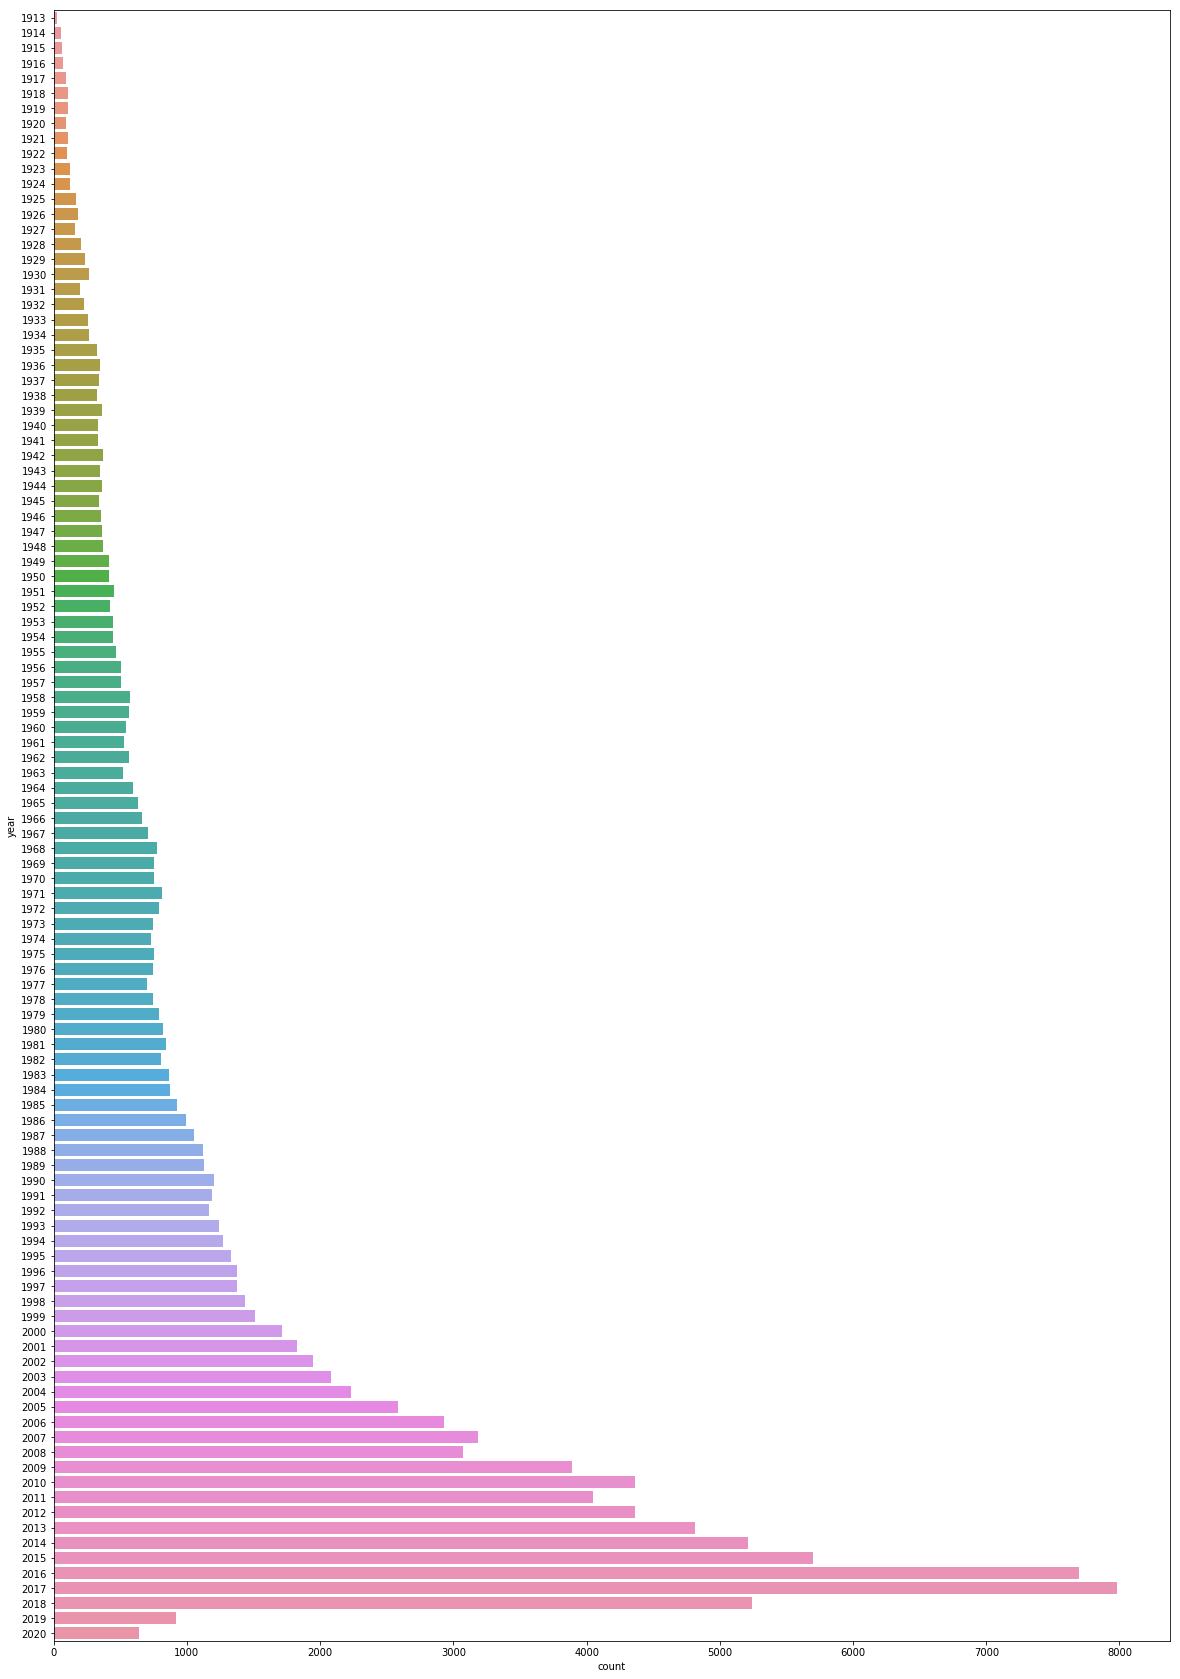

In [6]:
figsize = 20,30
figure, ax = plt.subplots(figsize=figsize)
sns.countplot(y='year', data=data_selected.sort_values(by='year',ascending=False), orient="v")
plt.show()

### region

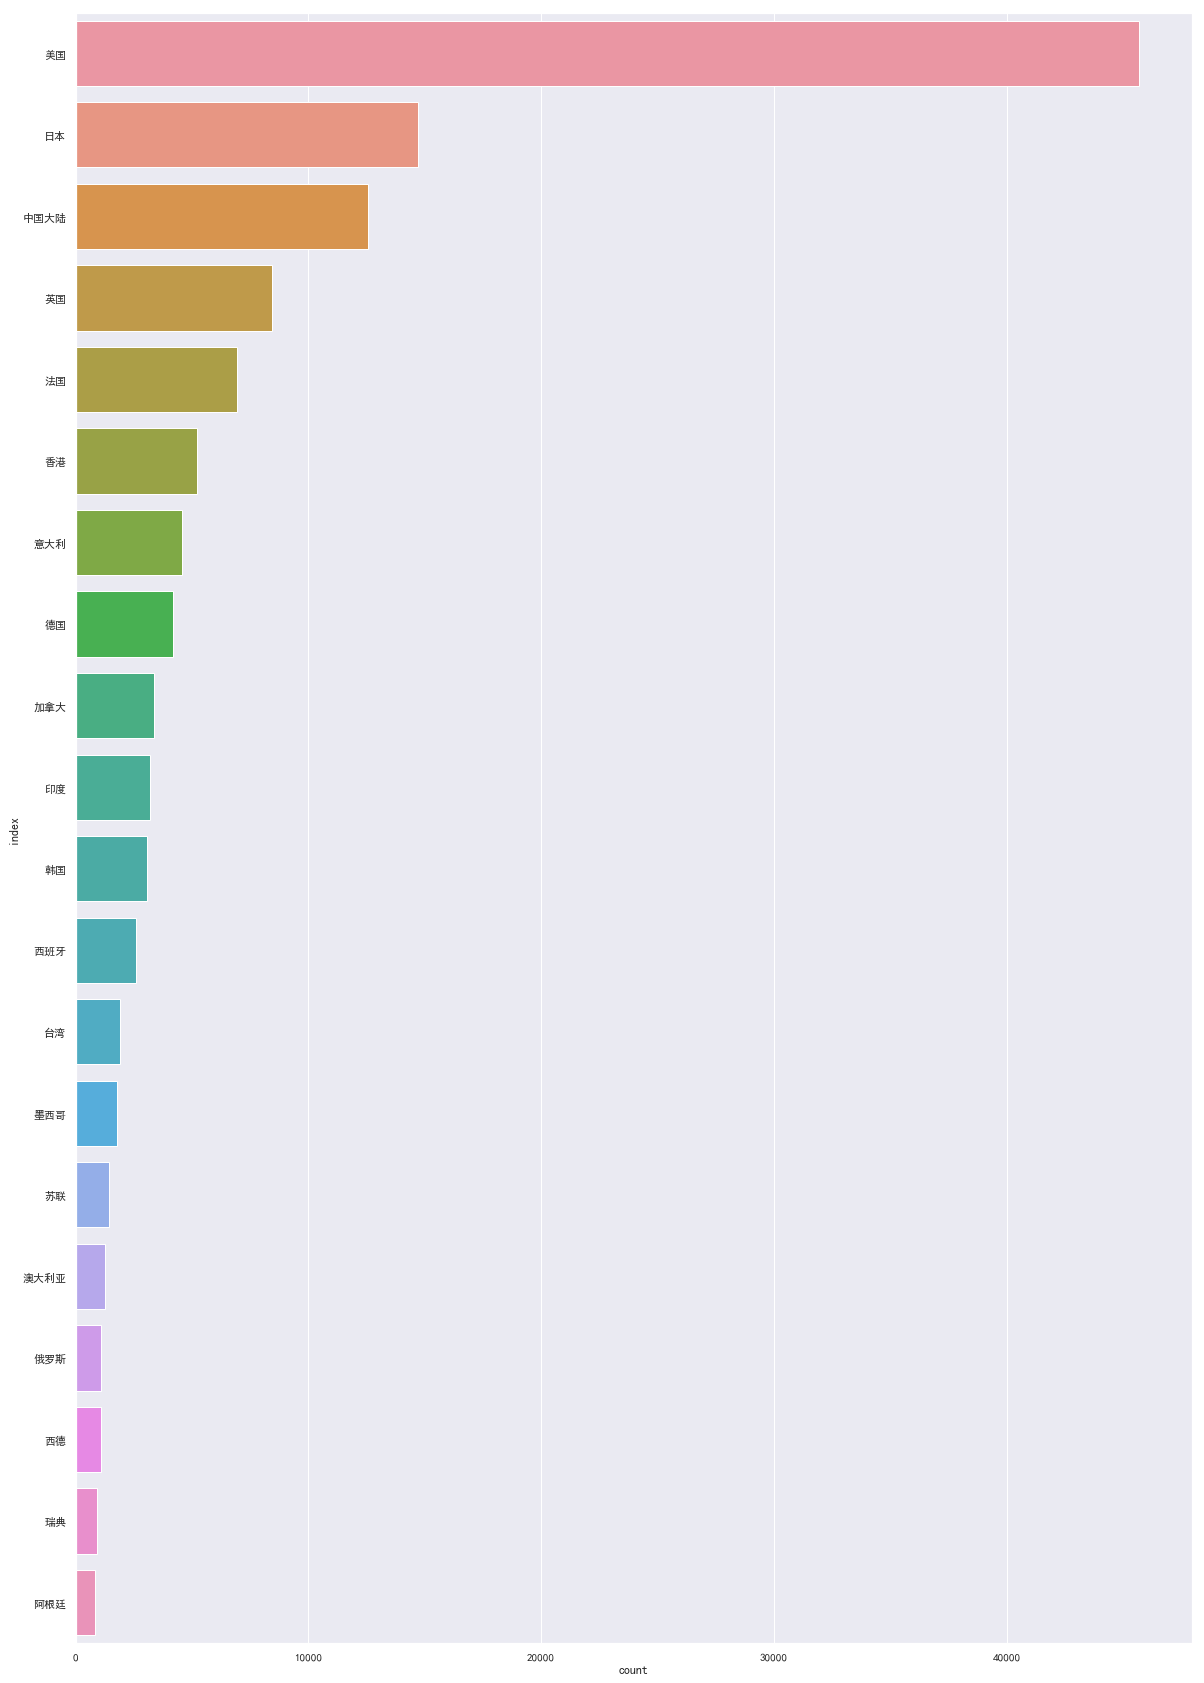

In [17]:
figsize = 20,30
figure, ax = plt.subplots(figsize=figsize)
# sns.countplot(y='index',data=region_count.reset_index().sort_values(by = 'count',ascending=False)[:20], orient="v")
ax = sns.barplot(x="count", y="index", data=region_count.reset_index().sort_values(by = 'count',ascending=False)[:20])
plt.show()

### region_trend

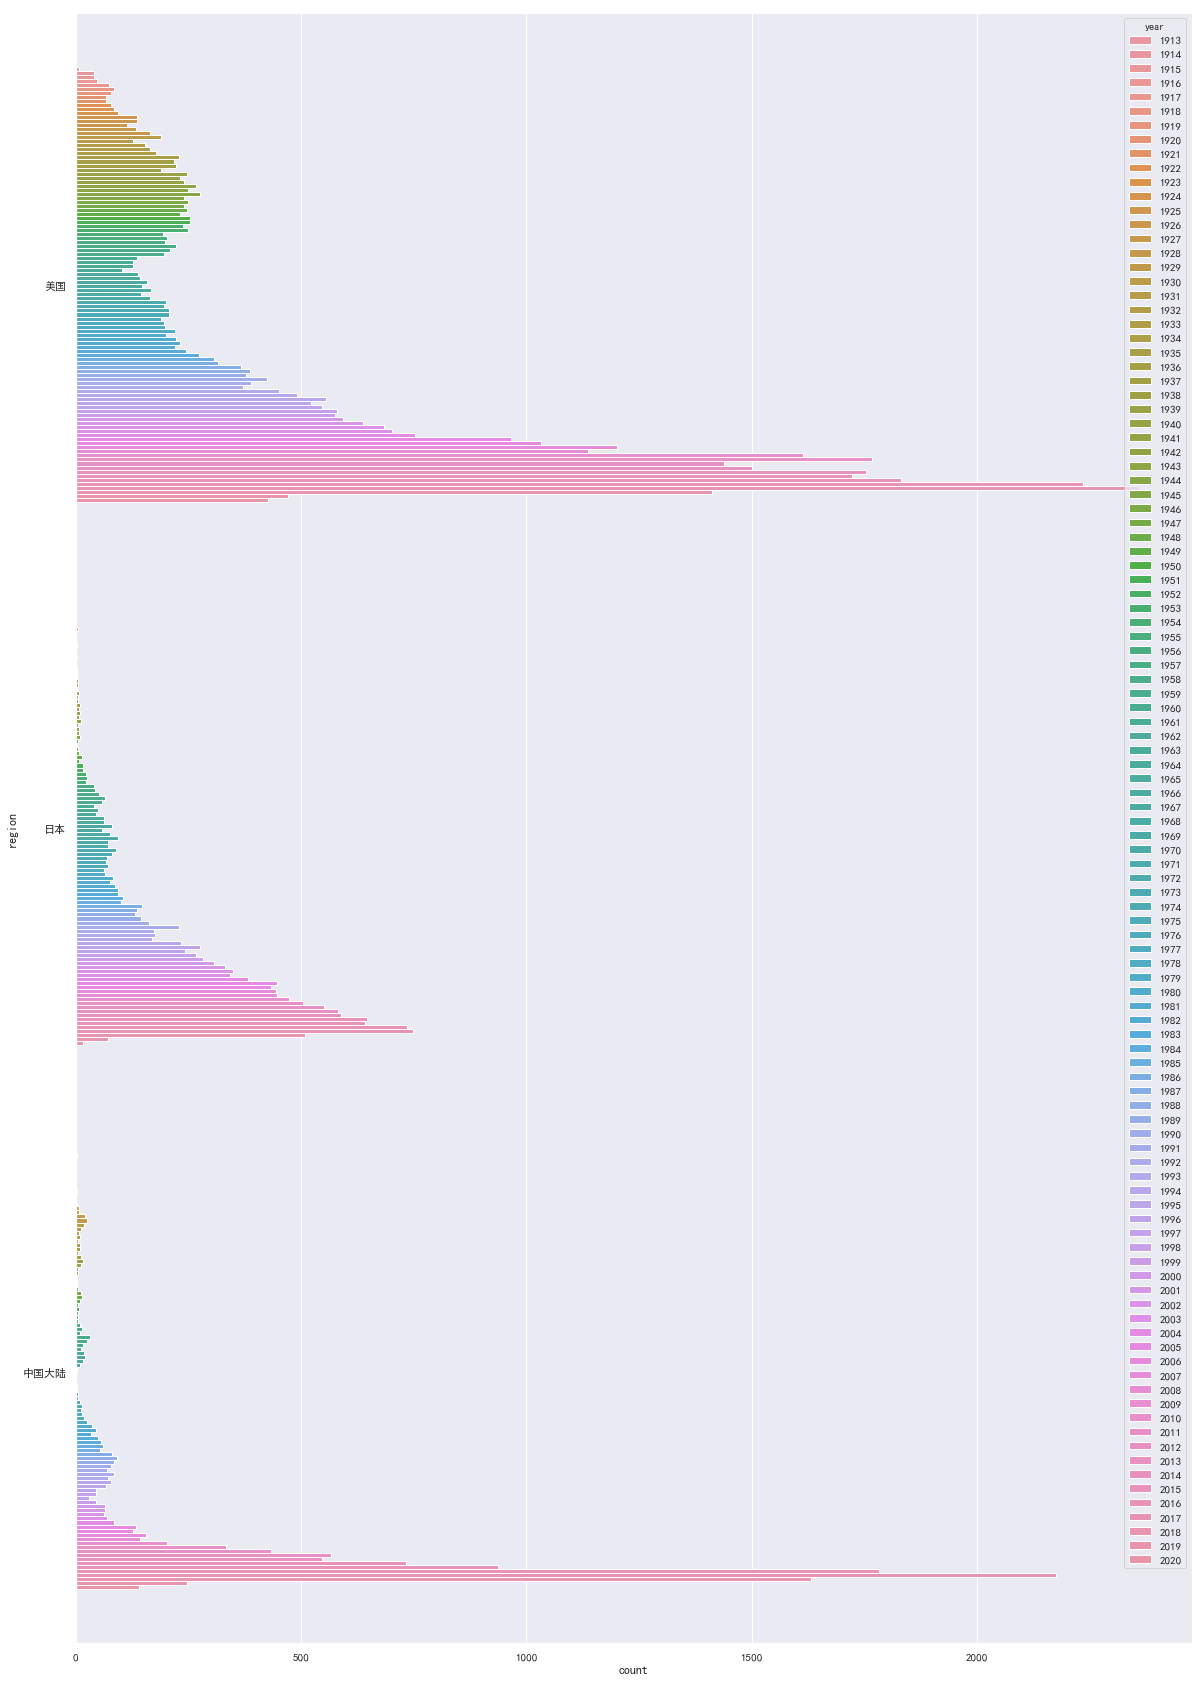

In [34]:
figsize = 20,30
figure, ax = plt.subplots(figsize=figsize)
sns.countplot(y='region', hue='year', data=data_selected_r_t.sort_values(by='region',ascending=False), orient="v")
plt.show()

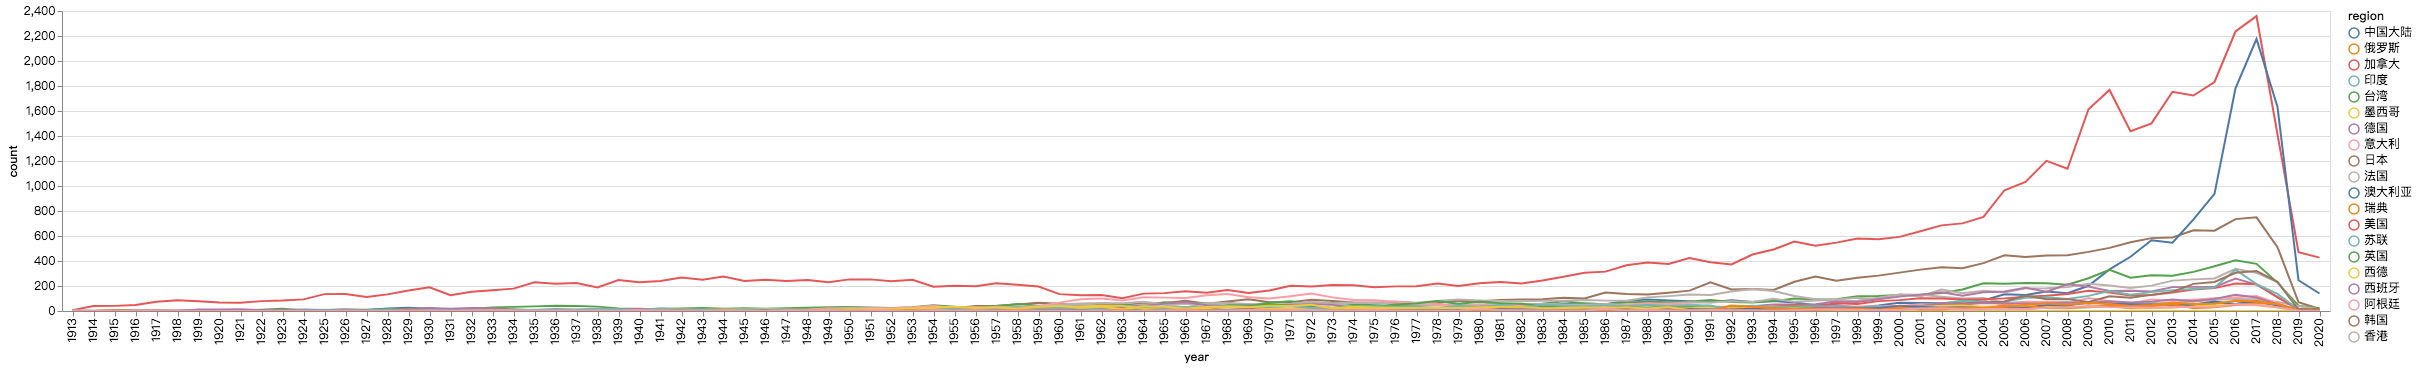

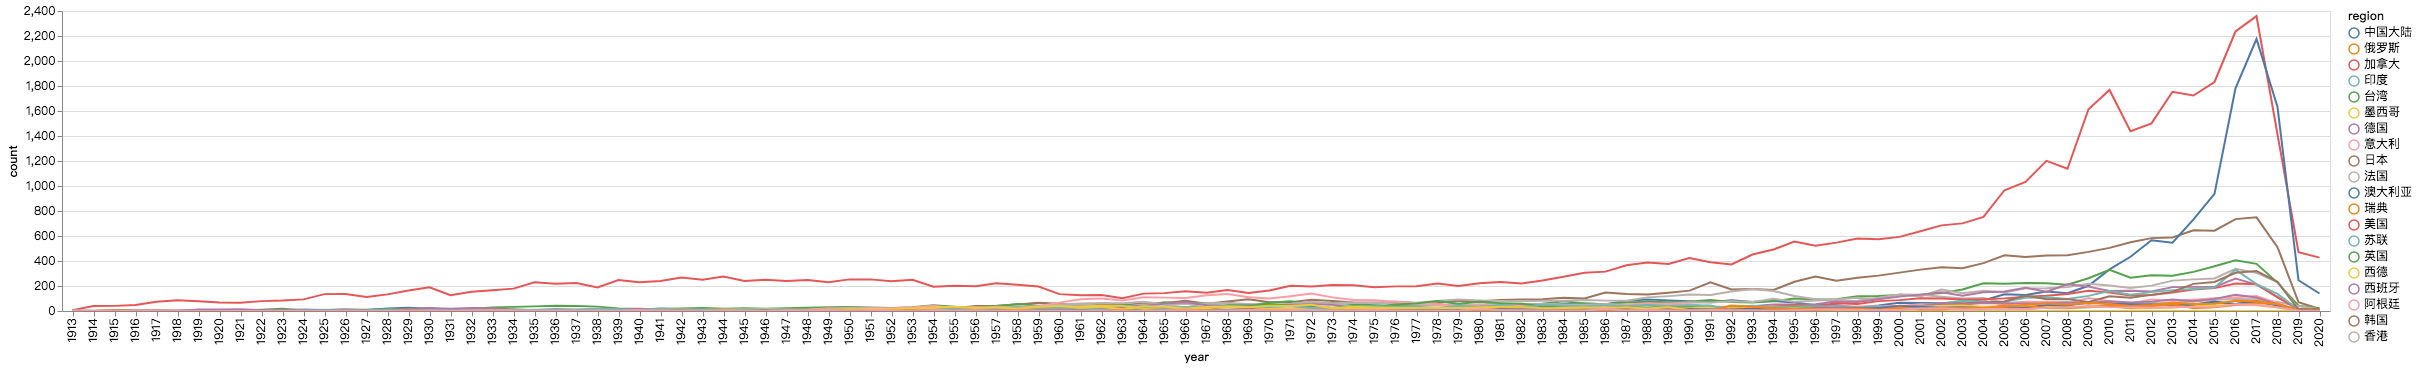

In [52]:
alt.Chart(region_count_year).mark_line().encode(
    x='year',
    y='count',
    color='region'
)

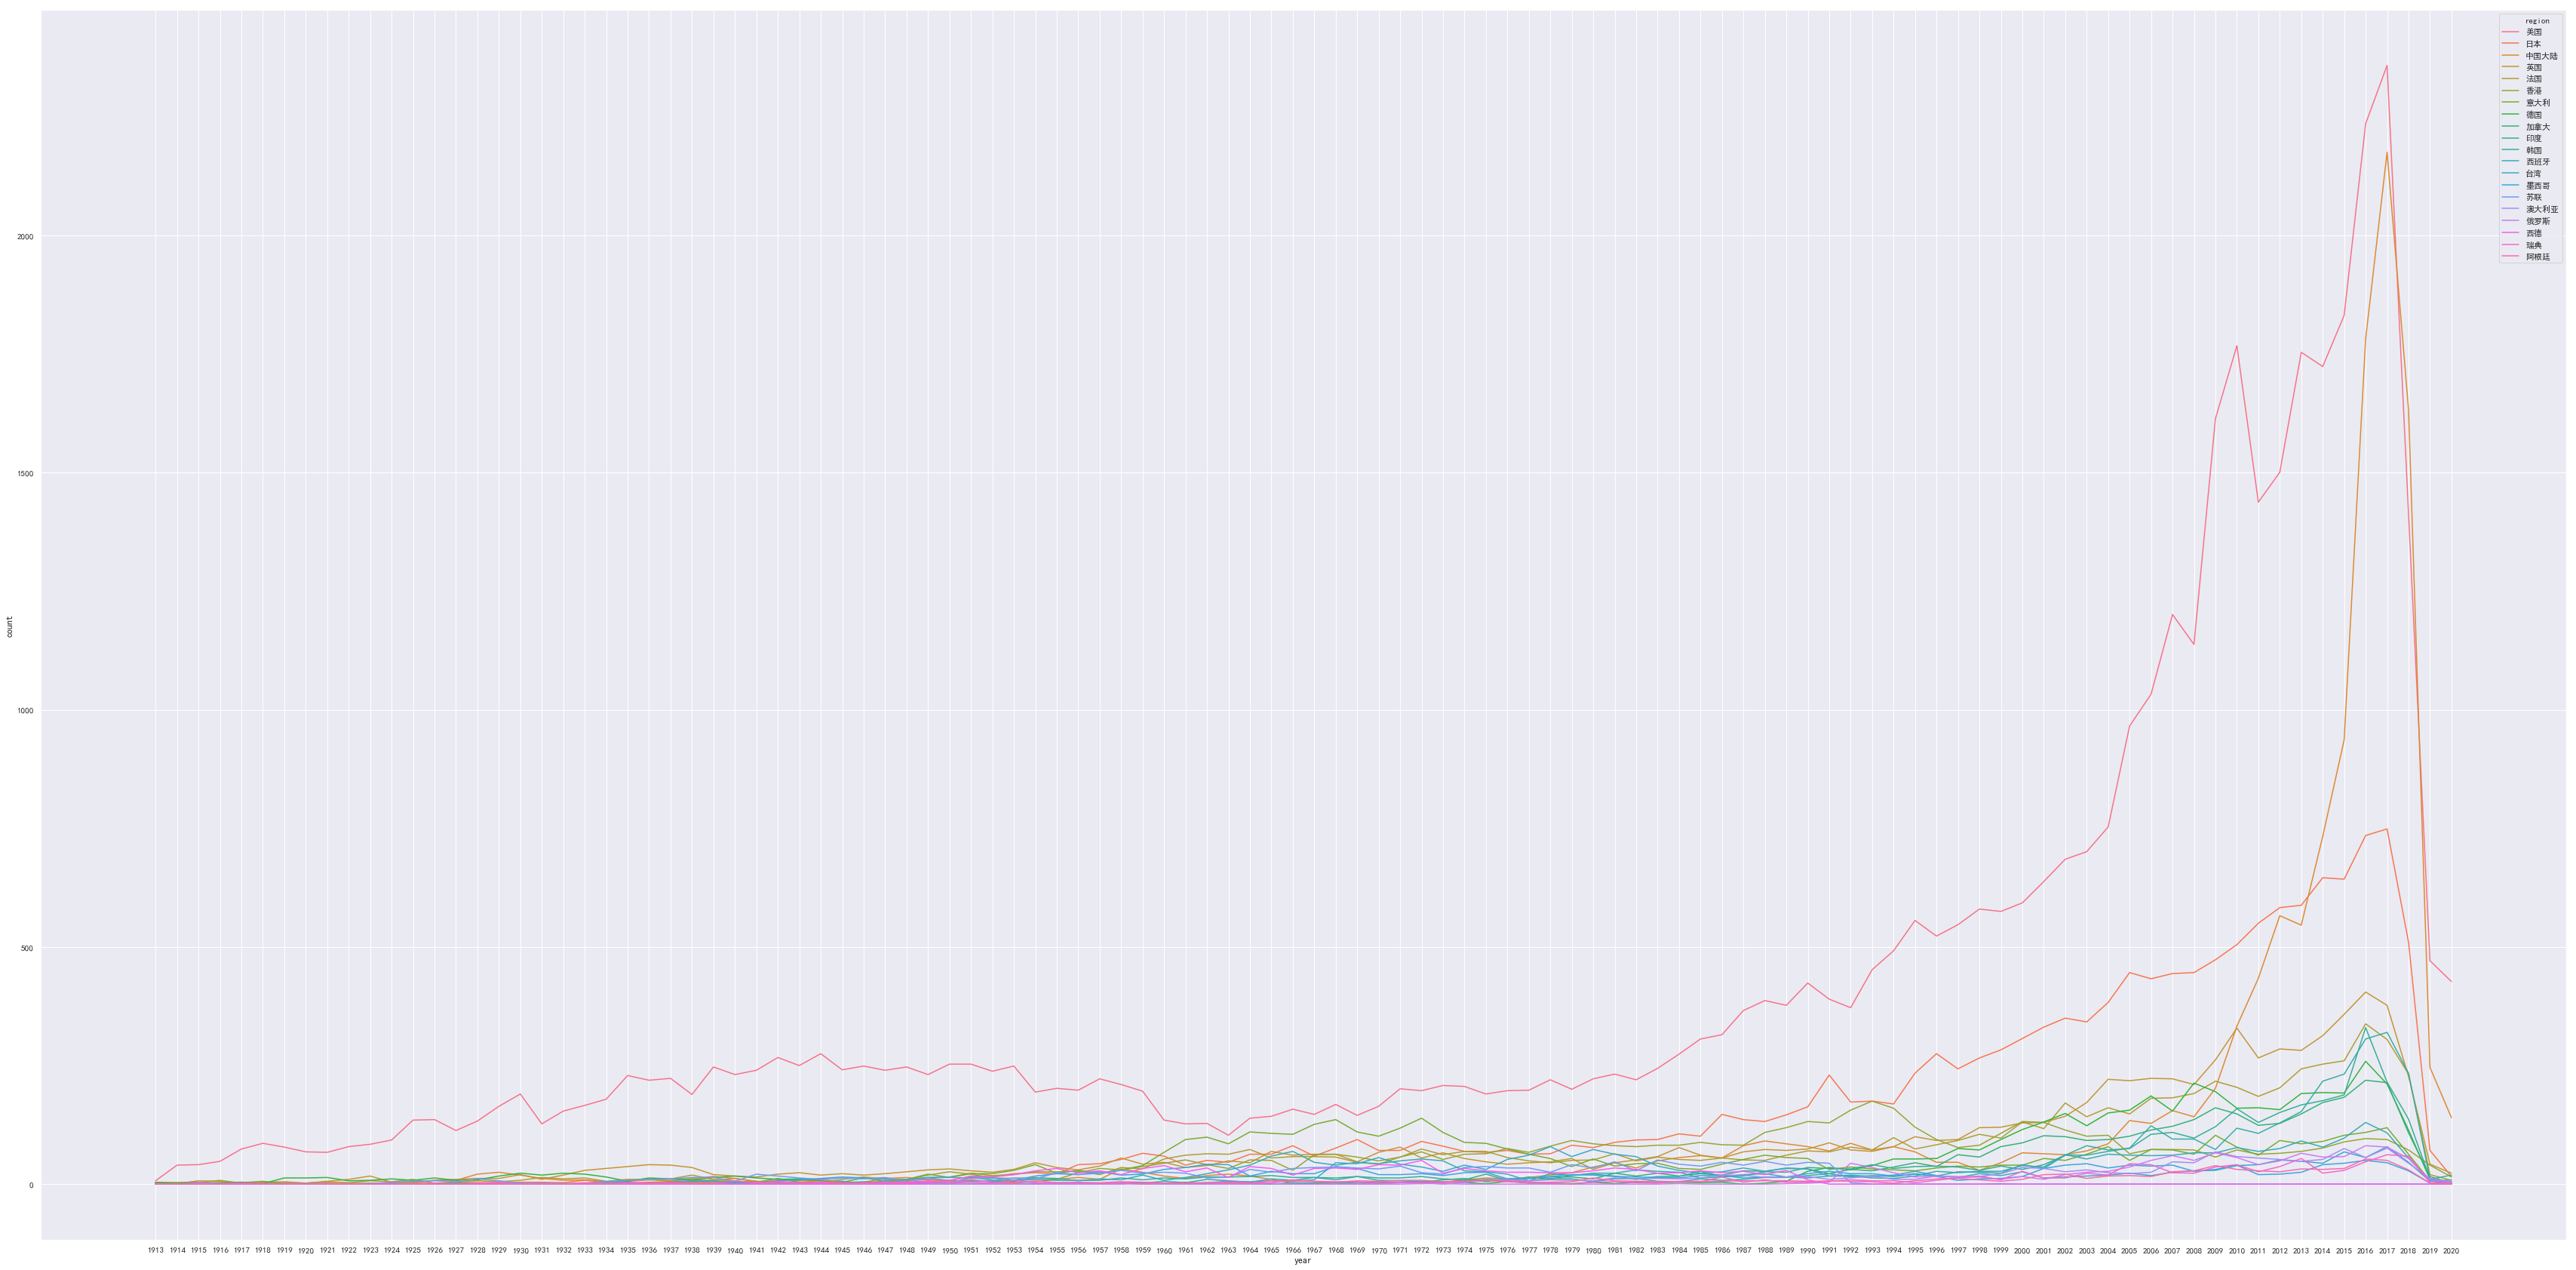

In [53]:
figsize = 60,30
figure, ax = plt.subplots(figsize=figsize)
ax = sns.lineplot(x="year", y="count", hue='region', data=region_count_year)
plt.show()

### type

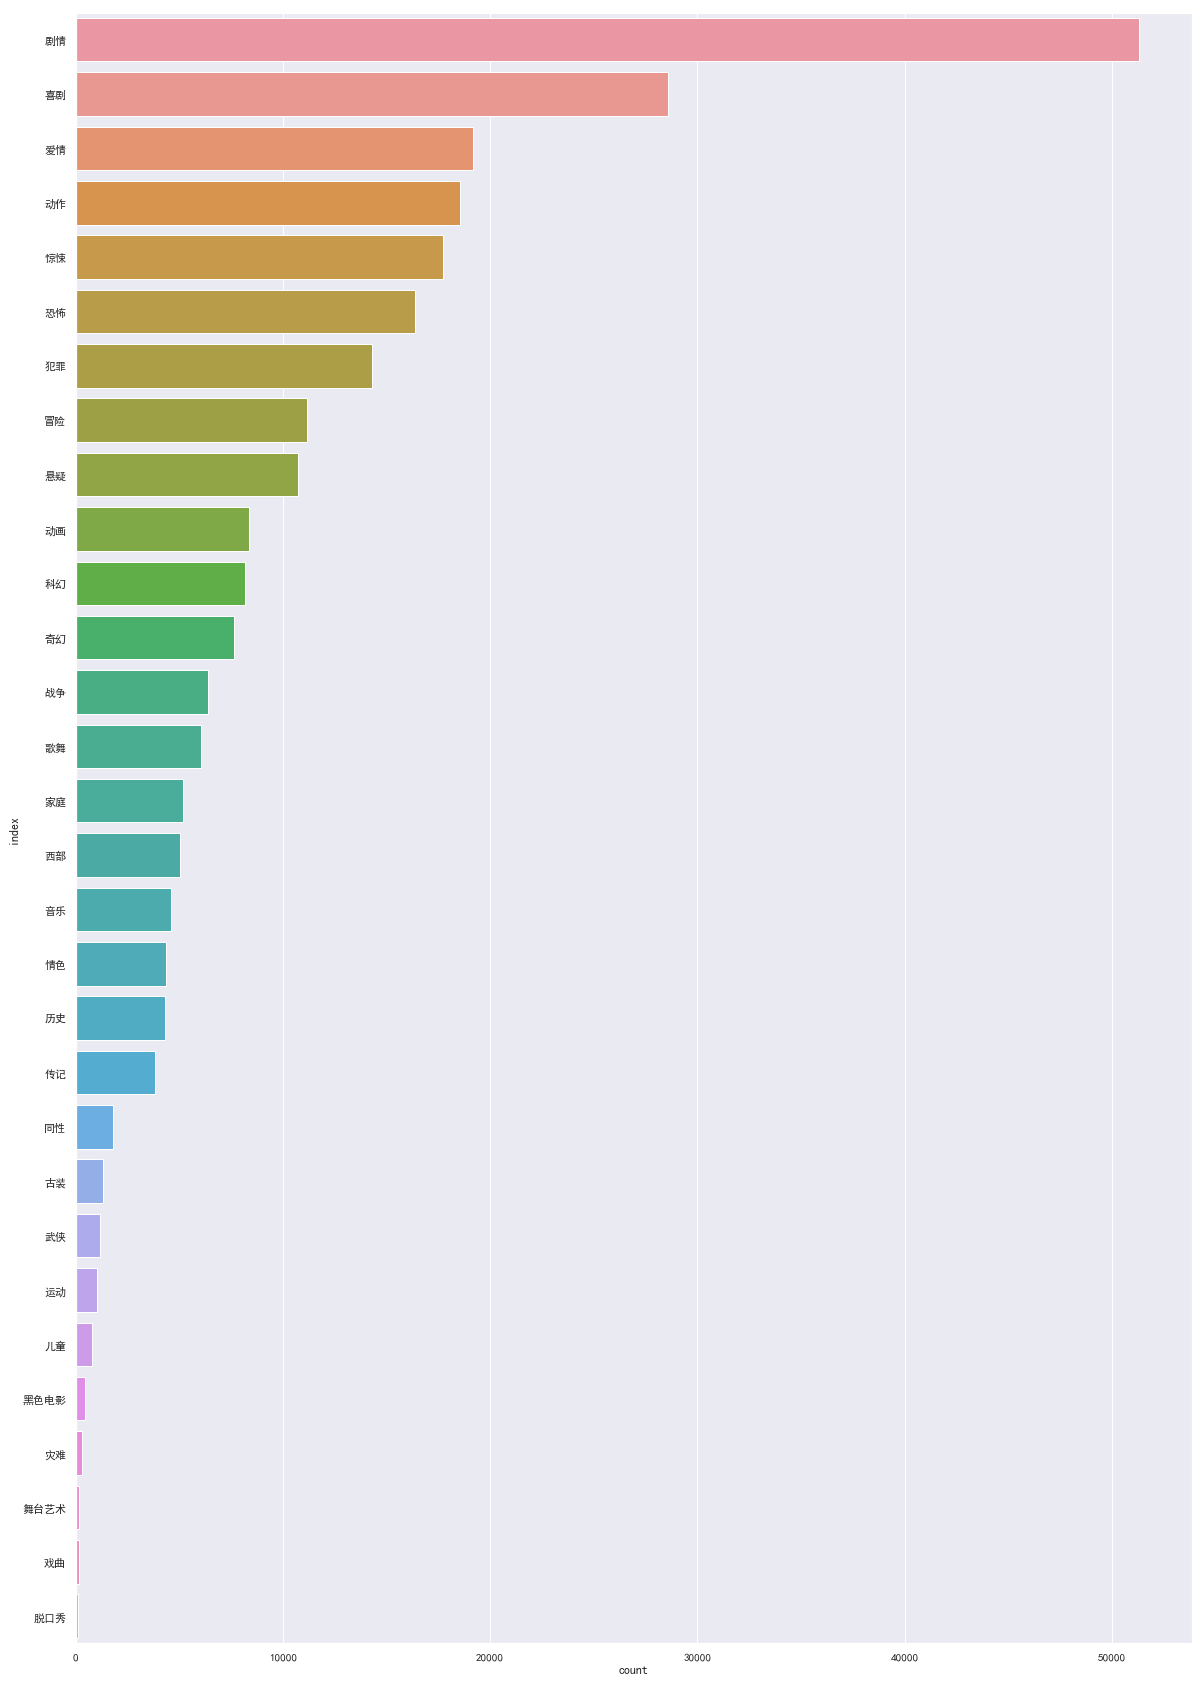

In [44]:
figsize = 20,30
figure, ax = plt.subplots(figsize=figsize)
ax = sns.barplot(x="count", y="index", data=type_count.reset_index().sort_values(by = 'count',ascending=False)[:30])
plt.show()

### month

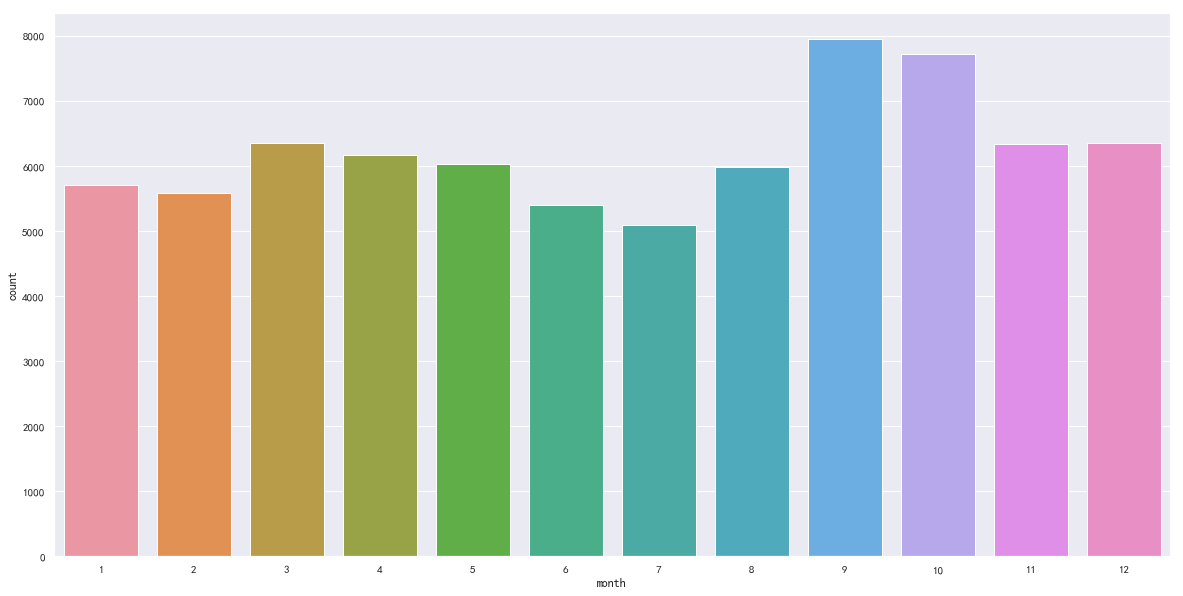

In [39]:
figsize = 20,10
figure, ax = plt.subplots(figsize=figsize)
sns.countplot(x='month', data=data_selected_m.sort_values(by='month',ascending=False), orient="v")
# sns.distplot(month.astype(int))
plt.show()

### month region

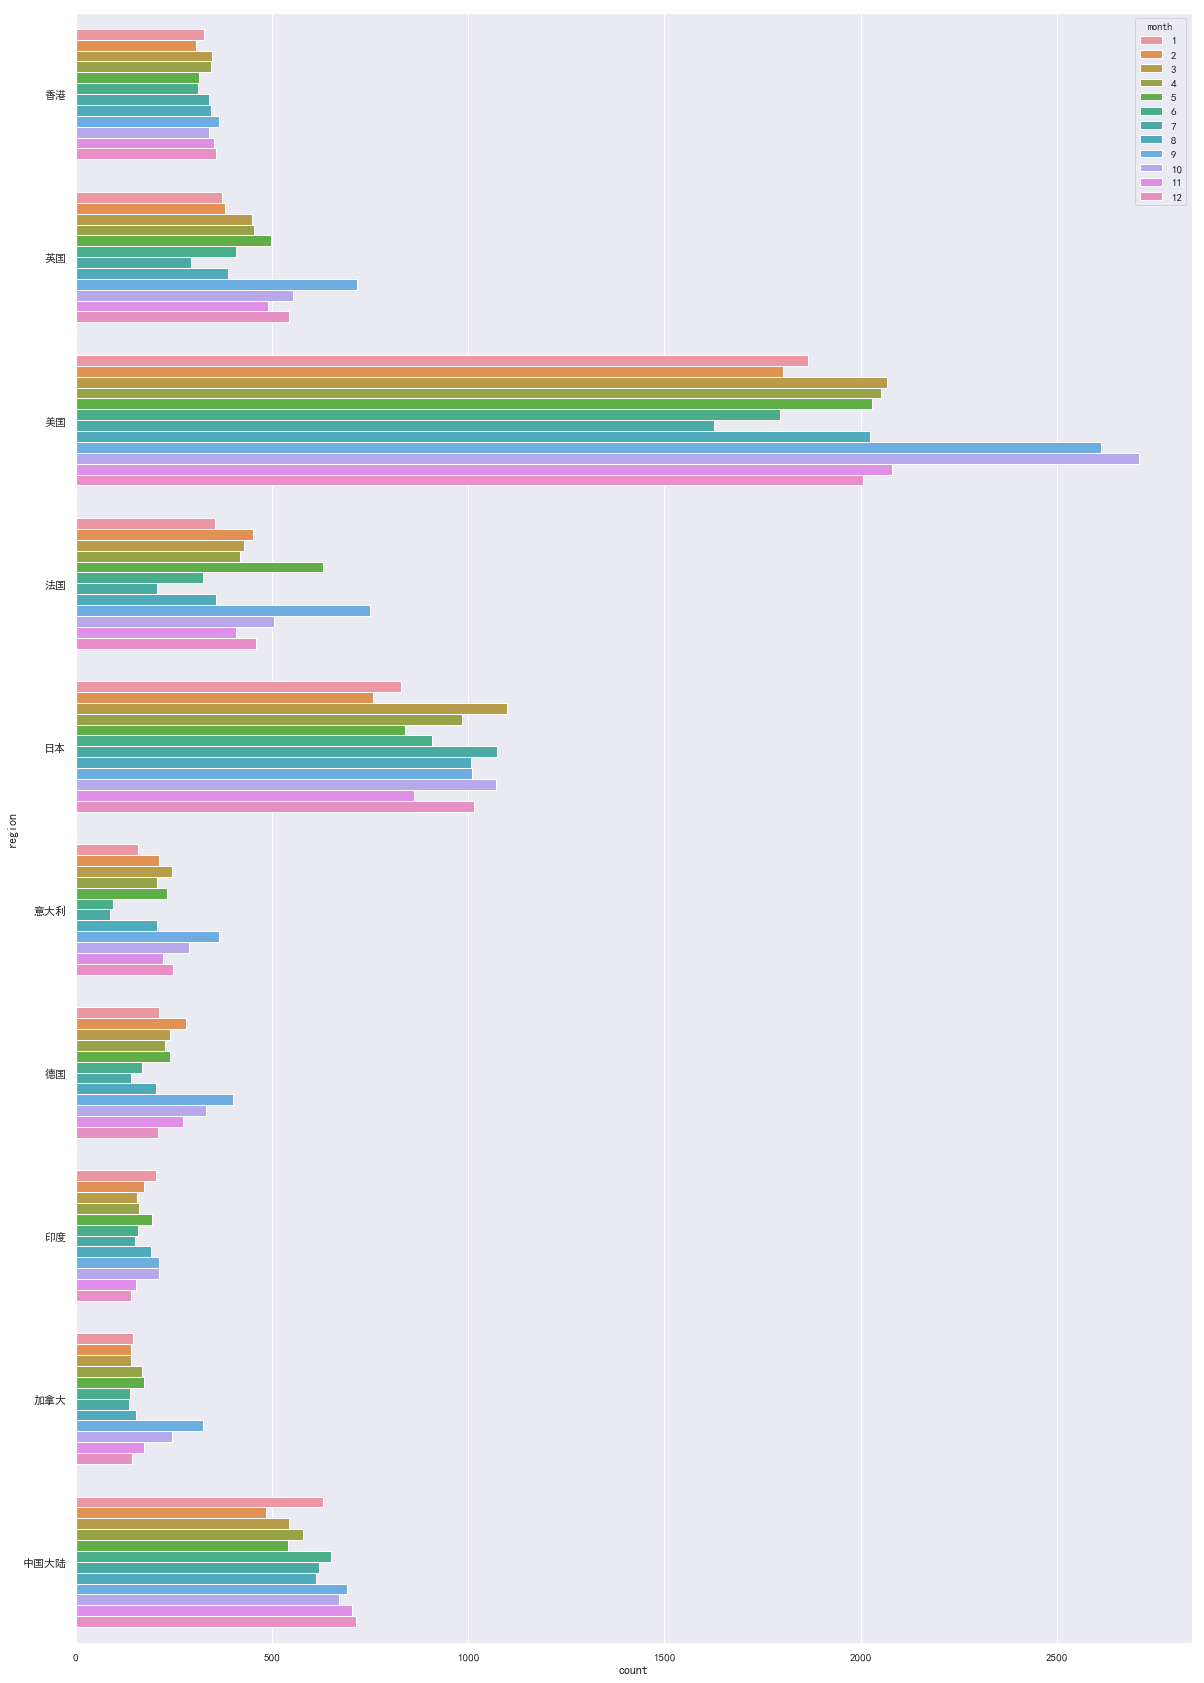

In [25]:
figsize = 20,30
figure, ax = plt.subplots(figsize=figsize)
sns.countplot(y='region', hue='month', data=data_selected_m_r.sort_values(by='region',ascending=False), orient="v")
plt.show()

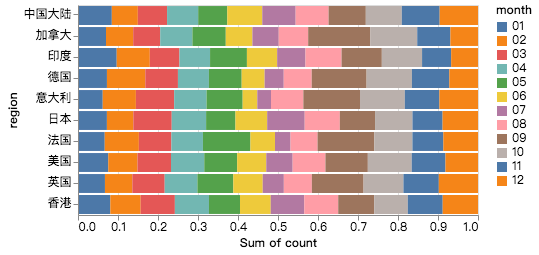

In [74]:
alt.data_transformers.enable('default', max_rows=None)
alt.Chart(region_count_month).mark_bar().encode(
    x=alt.X('sum(count)', stack="normalize"),
    y='region',
    color='month',
    order=alt.Order(
      'month',
      sort='ascending'
    )
)

### rate

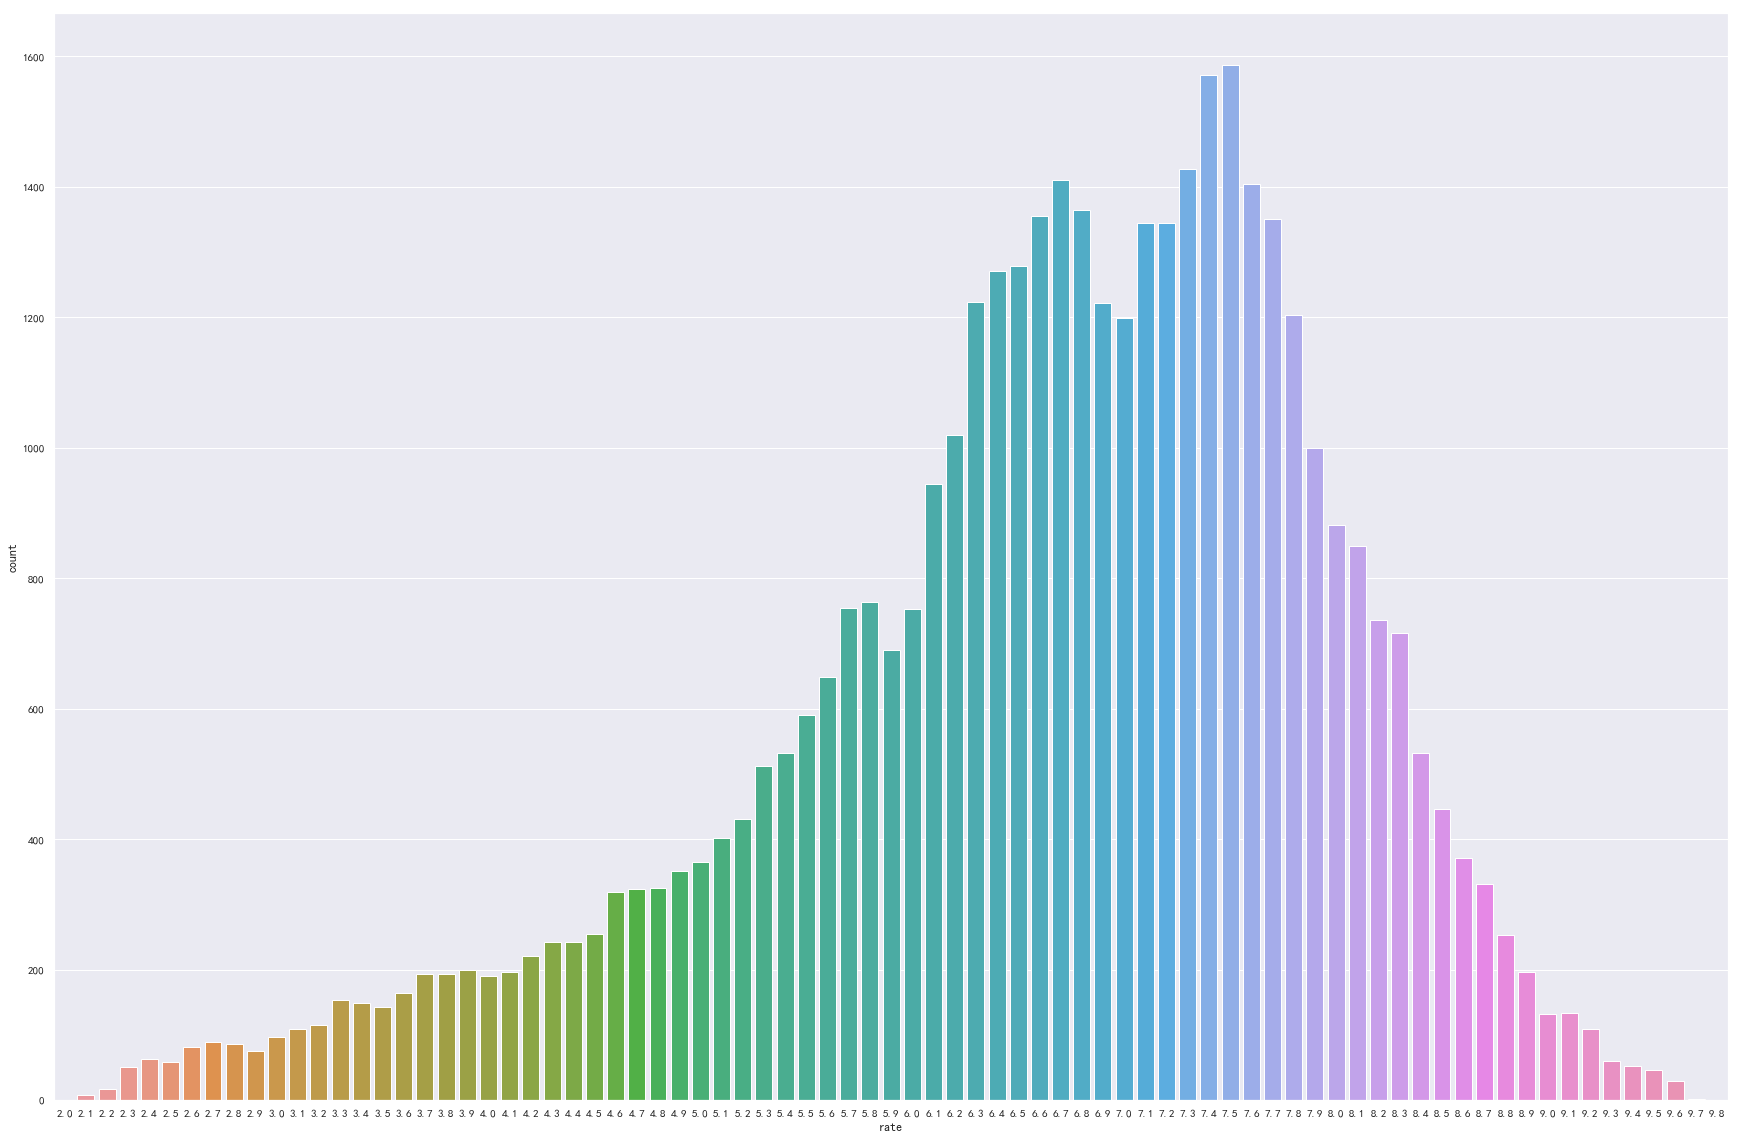

In [42]:
figsize = 30,20
figure, ax = plt.subplots(figsize=figsize)
sns.countplot(x='rate', data=data_selected_rate.sort_values(by='rate',ascending=False), orient="v")
# sns.distplot(data_selected_rate.rate)
plt.show()

In [96]:
data_selected_rate.rate.mean()

6.649343244803661

### rate_region

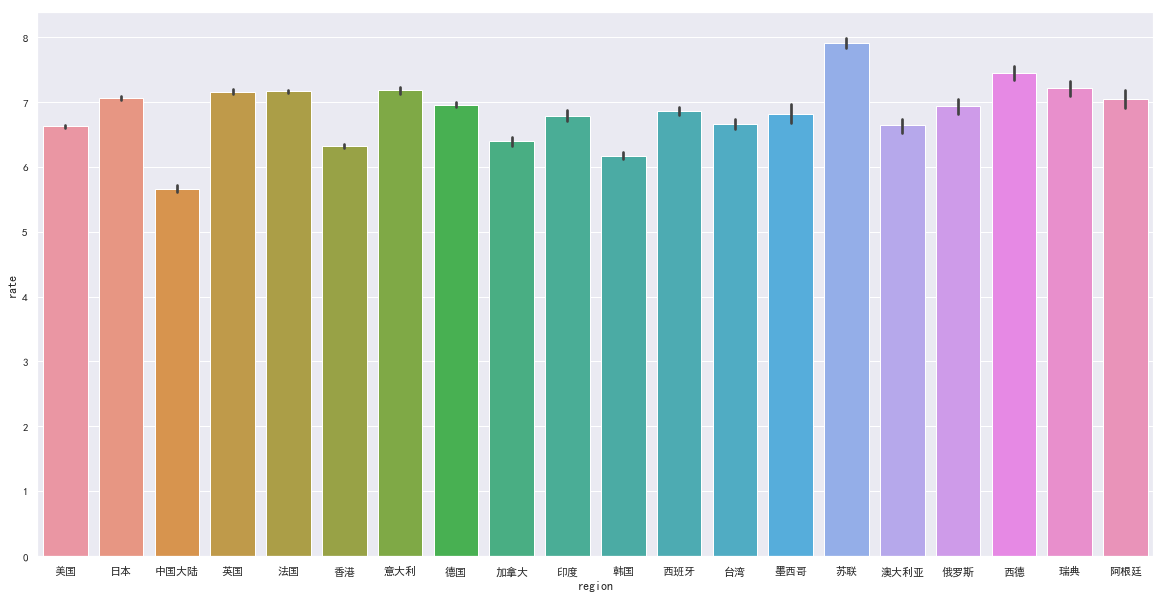

In [135]:
figsize = 20,10
figure, ax = plt.subplots(figsize=figsize)
ax = sns.barplot(x='region',y= 'rate',data=data_selected_rate_region)
plt.show()

### time

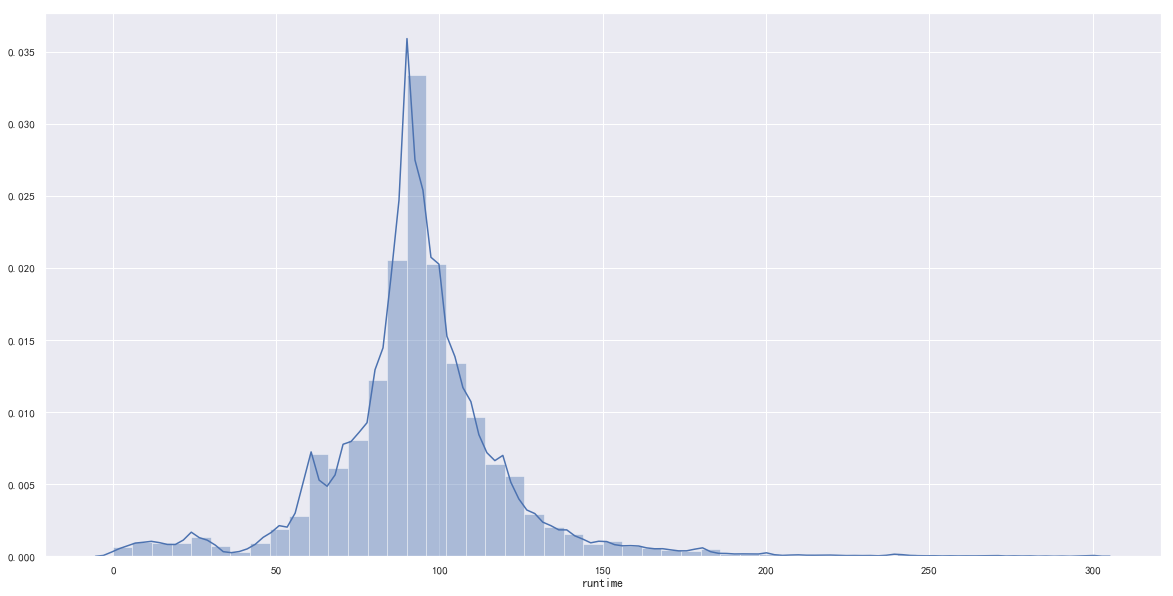

In [26]:
figsize = 20,10
figure, ax = plt.subplots(figsize=figsize)
# sns.countplot(y='runtime', data=data_selected_time.sort_values(by='runtime',ascending=False)orient=ent="v")
sns.distplot(data_selected_time.runtime)
plt.show()

### time_region

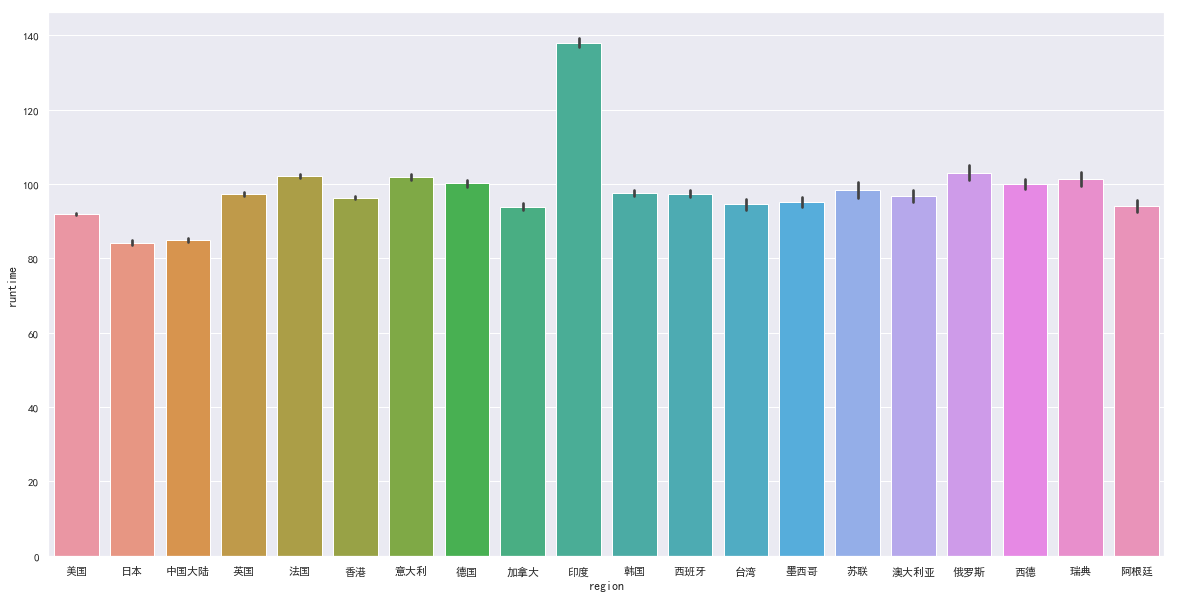

In [29]:
figsize = 20,10
figure, ax = plt.subplots(figsize=figsize)
ax = sns.barplot(x='region',y= 'runtime',data=data_selected_time_region)
plt.show()

### rate_time_month_region

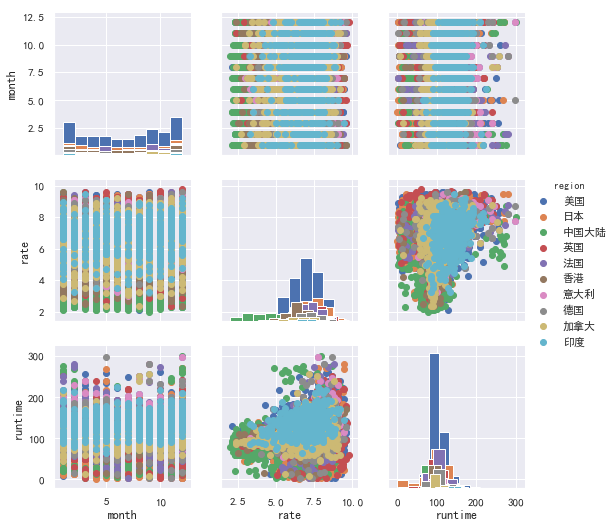

In [32]:
# iris = sns.load_dataset("iris")
g = sns.PairGrid(data_selected_rate_time_month_region, hue='region', vars=["month", "rate","runtime"])
# g = g.map(plt.scatter)
# g = g.map_upper(plt.scatter)
# g = g.map_lower(sns.kdeplot, cmap="Blues_d")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()
plt.show()